<a href="https://colab.research.google.com/github/anibahs/TravelBookings_DataAnalysis/blob/main/GroupedBar_NetOrders_RegionXPlatform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
from matplotlib import pyplot as plt
import numpy as np;
%matplotlib inline

In [102]:
df = pd.read_excel("/content/Dataset.xlsx",names=["week","mobile_indicator_name","platform_type_name","super_region","country_name","booking_window_group",
         "property_country","net_gross_booking_value_usd","net_orders"])
  


In [106]:
entries_by_platform=df.groupby(["super_region","platform_type_name"],as_index=False).agg(orders = ('net_orders', 'sum'))


  super_region platform_type_name  orders
0         APAC            Desktop  208023
1         APAC         Mobile App   77206
2         APAC         Mobile Web   48980
3         EMEA            Desktop  314955
4         EMEA         Mobile App   46535
5         EMEA         Mobile Web   86960
6        LATAM            Desktop   71338
7        LATAM         Mobile App    8839
8        LATAM         Mobile Web   12443


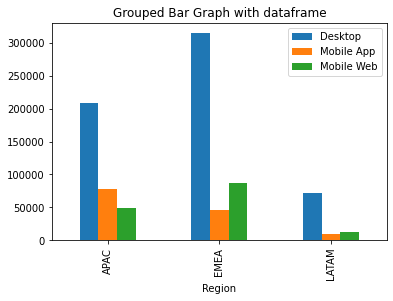

In [107]:
listofLists = []

for i in range(2,len(entries_by_platform),3):
    listofLists.append([entries_by_platform.loc[i-2, "super_region"],entries_by_platform.loc[i-2, 
              "orders"],entries_by_platform.loc[i-1, "orders"],entries_by_platform.loc[i, "orders"]])
    
    
df1=pd.DataFrame(listofLists, columns=['Region', 'Desktop', 'Mobile App', 'Mobile Web'])
print(entries_by_platform)
df1.plot(x='Region',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

# New section

In [ ]:
df.info()

In [ ]:
df.platform_type_name.value_counts()

In [ ]:

plat1 = df.loc[df.platform_type_name == 'Desktop']['net_orders']
plat2 = df.loc[df.platform_type_name == 'Mobile Web']['net_orders']
plat3 = df.loc[df.platform_type_name == 'Mobile App']['net_orders']

plat = pd.concat([plat1,plat2,plat3], axis =1)
plat.values.tolist()

plat





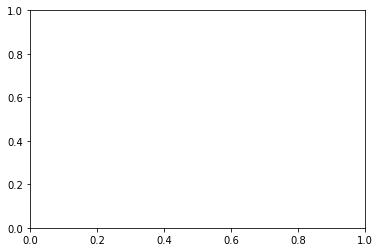

In [104]:
x  = ['Desktop','Mobile Web', 'Mobile App']

desktop = df.loc[df.platform_type_name == 'Desktop']['net_orders']
mobile_web = df.loc[df.platform_type_name == 'Mobile Web']['net_orders']
mobile_app = df.loc[df.platform_type_name == 'Mobile App']['net_orders']

 
df.plot(x= "platform_type_name", y= "net_orders", kind="bar")

In [ ]:
plt.pie(plat,x)
plt.show()